In [2531]:
import sys
import numpy as np
from numpy.linalg import norm
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt

In [2532]:
sys.path.append('Тема №8')

%load_ext autoreload
%autoreload 2
from task8 import (Parameters, fix_step, auto_step)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2533]:
c2: float = 1 / 9
a21: float = c2
b1: float = 1 - 1 / (2 * c2)
b2: float = 1 / (2 * c2)

params = Parameters(
    ksi=1 / 9,
    A=2 / 11,
    B=3 / 13,
    eps=1e-10,
    p=1e-5,
    rtol=1e-6, # погрешность для подбора первого шага
    pi=np.pi,
    c2=c2,
    a21=a21,
    b1=b1,
    b2=b2,
)

# Посчитаем необходимые коэффициенты
print(f'\nДля двухэтапного метода Рунге-Кутты: \nc2 = {c2}, \na21 = {a21}, \nb1 = {b1}, \nb2 = {b2}')


Для двухэтапного метода Рунге-Кутты: 
c2 = 0.1111111111111111, 
a21 = 0.1111111111111111, 
b1 = -3.5, 
b2 = 4.5


In [2534]:
# Начальные данные
x0 = 0.0
x1 = params.pi
y0 = np.array([params.B * params.pi, params.A * params.pi])

### Точное решение поставленной задачи Коши


In [2535]:
# Точное решение данной задачи Коши
def y1(x):
    return ((params.B * params.pi * np.cos(x * np.sqrt(params.A * params.B))) +
            (np.sqrt(params.A ** 3 / params.B) * params.pi * np.sin(x * np.sqrt(params.A * params.B))))


def y2(x):
    return (params.A * params.pi * np.cos(x * np.sqrt(params.A * params.B)) -
            np.sqrt((params.B ** 3) / params.A) * params.pi * np.sin(x * np.sqrt(params.A * params.B)))


y_true = np.array([y1(x1), y2(x1)])
print(y_true)

[ 0.88419223 -0.03311322]


### Часть №1. Расчетные схемы метода Рунге-Кутты с постоянным шагом

In [2536]:
s_2 = 2
s_3 = 3

In [2537]:
# Явный метод Рунге-Кутты 2-го порядка (ЯМРК 2)
params.rtol = params.eps
fix_step_values_2, fix_step_full_errors_2, fix_step_steps_2, fix_step_calc_count_2 = fix_step(x0, x1, y0, s_2, params)
fix_step_count_2 = np.ceil((x1 - x0) / fix_step_steps_2)

df_fix_2 = pd.DataFrame({
    "Кол-во шагов": fix_step_count_2,
    "Длина шага": fix_step_steps_2,
    "Результаты": fix_step_values_2.tolist(),
    "Полная погрешность": fix_step_full_errors_2,
    "Кол-во подсчётов": fix_step_calc_count_2,
})

print(f"Полученное значение (фиксированный шаг): {fix_step_values_2[-1]}")
print(f"Реальное значение: {y_true}")
print(f'Истинная погрешность: {y_true - fix_step_values_2[-1]}\n')
display(df_fix_2)

Полученное значение (фиксированный шаг): [ 0.88419177 -0.03312901]
Реальное значение: [ 0.88419223 -0.03311322]
Истинная погрешность: [4.66073549e-07 1.57919856e-05]



,Кол-во шагов,Длина шага,Результаты,Полная погрешность,Кол-во подсчётов
0,2313.0,0.001358,"[0.8841886939780477, -0.03323295645411097]",2.069472e-09,13878
1,4626.0,0.000679,"[0.8841907439989822, -0.033163657217470006]",2.310985e-05,27754
2,9251.0,0.000340,"[0.8841917673933445, -0.03312900792686651]",1.155480e-05,55504
3,18501.0,0.000170,"[0.8841917673962103, -0.03312900782991994]",3.232964e-11,111006


In [2538]:
# Явный метод Рунге-Кутты 3-го порядка (ЯМРК 3)
params.rtol = params.eps
fix_step_values_3, fix_step_full_errors_3, fix_step_steps_3, fix_step_calc_count_3 = fix_step(x0, x1, y0, s_3, params)
fix_step_count_3 = np.ceil((x1 - x0) / fix_step_steps_3)

df_fix_3 = pd.DataFrame({
    "Кол-во шагов": fix_step_count_3,
    "Длина шага": fix_step_steps_3,
    "Результаты": fix_step_values_3.tolist(),
    "Полная погрешность": fix_step_full_errors_3,
    "Кол-во подсчётов": fix_step_calc_count_3,
})

print(f"Полученное значение (фиксированный шаг): {fix_step_values_3[-1]}")
print(f"Реальное значение: {y_true}")
print(f'Истинная погрешность: {y_true - fix_step_values_3[-1]}\n')
display(df_fix_3)

Полученное значение (фиксированный шаг): [ 0.88419051 -0.03317157]
Реальное значение: [ 0.88419223 -0.03311322]
Истинная погрешность: [1.72340397e-06 5.83566008e-05]



,Кол-во шагов,Длина шага,Результаты,Полная погрешность,Кол-во подсчётов
0,328.0,0.009601,"[0.8841759270285046, -0.03366131736461961]",1.399884e-04,2949
1,655.0,0.004800,"[0.8841905100633244, -0.03317157244508417]",6.999457e-05,5892
2,1309.0,0.002400,"[0.8841905100657916, -0.033171572445174984]",3.527028e-13,11781


### Часть №2. Расчетные схемы метода Рунге-Кутты с автоматическим выбором шага

In [2539]:
params.rtol = params.p
auto_step_values_2, auto_step_local_errors_2, auto_step_steps_2, auto_step_calc_count_2 = auto_step(x0, x1, y0, s_2, params)

df_auto_2 = pd.DataFrame({
    "Кол-во шагов": np.ones(len(auto_step_steps_2)),
    "Длина шага": auto_step_steps_2,
    "Результаты": auto_step_values_2.tolist(),
    "Локальная погрешность": auto_step_local_errors_2,
    "Кол-во подсчётов": auto_step_calc_count_2,
})

print(f"Полученное значение (фиксированный шаг): {auto_step_values_2[-1]}")
print(f"Реальное значение: {y_true}")
print(f'Истинная погрешность: {y_true - auto_step_values_2[-1]}\n')
display(df_auto_2)

Полученное значение (фиксированный шаг): [ 0.88419178 -0.03314357]
Реальное значение: [ 0.88419223 -0.03311322]
Истинная погрешность: [4.52753062e-07 3.03494892e-05]



,Кол-во шагов,Длина шага,Результаты,Локальная погрешность,Кол-во подсчётов
0,1.0,0.063055,"[0.7314710183105251, 0.5606016208452207]",3.452936e-07,6
1,1.0,0.126111,"[0.7440811233486804, 0.5391269601251955]",2.766625e-06,6
2,1.0,0.126111,"[0.756194623770059, 0.5172924791320442]",2.774067e-06,6
3,1.0,0.126111,"[0.7678034348669787, 0.4951127503425736]",2.781314e-06,6
4,1.0,0.063055,"[0.773415665943189, 0.4838989619134011]",3.484879e-07,6
5,1.0,0.126111,"[0.784253043878397, 0.4612291998788234]",2.791778e-06,6
6,1.0,0.126111,"[0.7945670059207389, 0.43825160706059746]",2.798460e-06,6
7,1.0,0.126111,"[0.8043506683866474, 0.4149815188637955]",2.804887e-06,6
8,1.0,0.126111,"[0.8135975015182009, 0.3914344659090805]",2.811045e-06,6
9,1.0,0.031528,"[0.8158243575302421, 0.3855068781384191]",4.400571e-08,6


In [2540]:
params.rtol = params.p
auto_step_values_3, auto_step_local_errors_3, auto_step_steps_3, auto_step_calc_count_3 = auto_step(x0, x1, y0, s_3, params)

df_auto_3 = pd.DataFrame({
    "Кол-во шагов": np.ones(len(auto_step_steps_3)),
    "Длина шага": auto_step_steps_3,
    "Результаты": auto_step_values_3.tolist(),
    "Локальная погрешность": auto_step_local_errors_3,
    "Кол-во подсчётов": auto_step_calc_count_3,
})

print(f"Полученное значение (фиксированный шаг): {auto_step_values_3[-1]}")
print(f"Реальное значение: {y_true}")
print(f'Истинная погрешность: {y_true - auto_step_values_3[-1]}\n')
display(df_auto_3)

Полученное значение (фиксированный шаг): [ 0.88418901 -0.03311328]
Реальное значение: [ 0.88419223 -0.03311322]
Истинная погрешность: [3.22117121e-06 6.40929311e-08]



,Кол-во шагов,Длина шага,Результаты,Локальная погрешность,Кол-во подсчётов
0,1.0,0.170730,"[0.7422670118159808, 0.5422914284347128]",5.748992e-08,9
1,1.0,0.170730,"[0.7586433840817197, 0.5127210287185222]",5.725975e-08,9
2,1.0,0.341460,"[0.7885933326819289, 0.45173571130305357]",9.120676e-07,9
3,1.0,0.170730,"[0.8021309353156597, 0.4203958384723654]",5.661217e-08,9
4,1.0,0.170730,"[0.814687611413034, 0.3885418680371094]",5.641449e-08,9
5,1.0,0.170730,"[0.8262480055538426, 0.3562127542392472]",5.622771e-08,9
6,1.0,0.170730,"[0.8367979806716634, 0.3234480323680705]",5.605287e-08,9
7,1.0,0.170730,"[0.8463246353419102, 0.29028777041247605]",5.589093e-08,9
8,1.0,0.170730,"[0.8548163195588125, 0.2567725200618093]",5.574280e-08,9
9,1.0,0.170730,"[0.8622626489820371, 0.22294326711519719]",5.560931e-08,9


### Часть №3. Анализ эффективности методов Рунге-Кутты

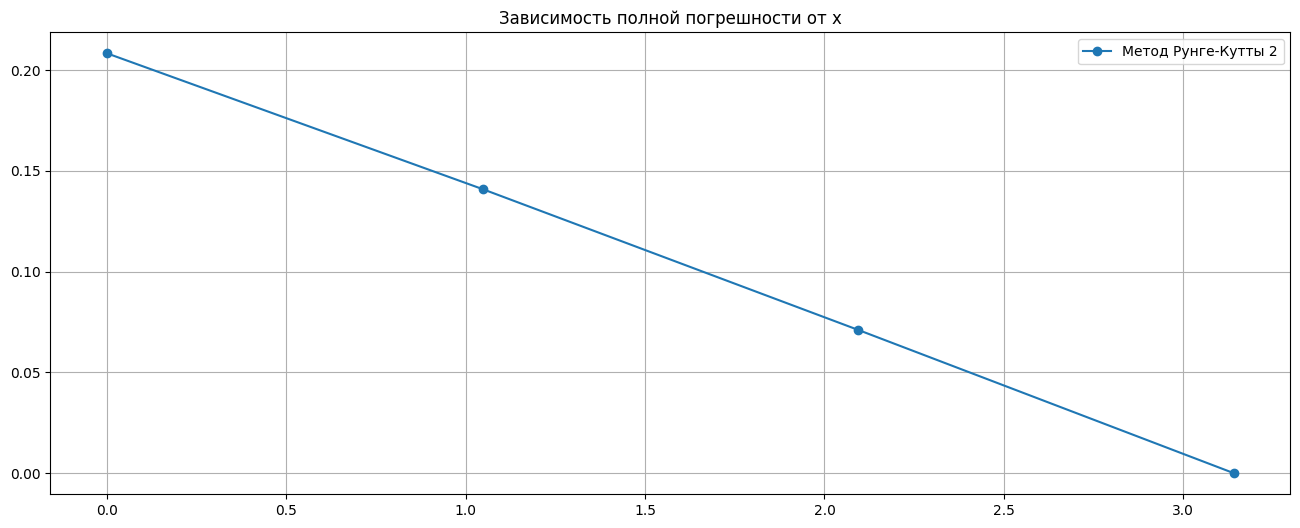

In [2541]:
args_2 = np.linspace(x0, x1, len(fix_step_values_2))

p = []
for i, arg in enumerate(args_2):
    real_y = np.array([y1(arg), y2(arg)])
    p.append(norm((fix_step_values_2[i] - real_y) / (pow(2, s_2) - 1)))

# Строим график
plt.figure(figsize=(16, 6))
plt.title("Зависимость полной погрешности от x")
plt.plot(np.linspace(x0, x1, len(fix_step_full_errors_2)), p, marker='o', label="Метод Рунге-Кутты 2")
# plt.plot(np.linspace(x0, x1, len(fix_step_full_errors_3)), fix_step_full_errors_3, marker='o', label="Метод Рунге-Кутты 3")
plt.grid()
plt.legend();

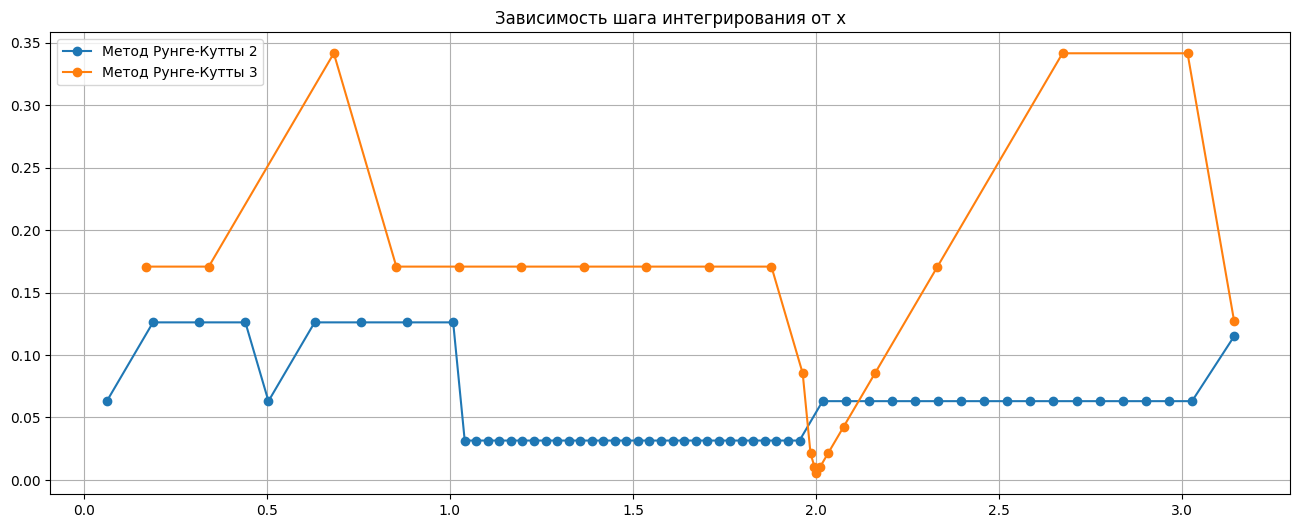

In [2542]:
# Строим графики
plt.figure(figsize=(16, 6))
plt.title('Зависимость шага интегрирования от x')
plt.plot(x0 + np.cumsum(auto_step_steps_2), auto_step_steps_2, marker='o', label="Метод Рунге-Кутты 2")
plt.plot(x0 + np.cumsum(auto_step_steps_3), auto_step_steps_3, marker='o', label="Метод Рунге-Кутты 3")
plt.grid()
plt.legend();

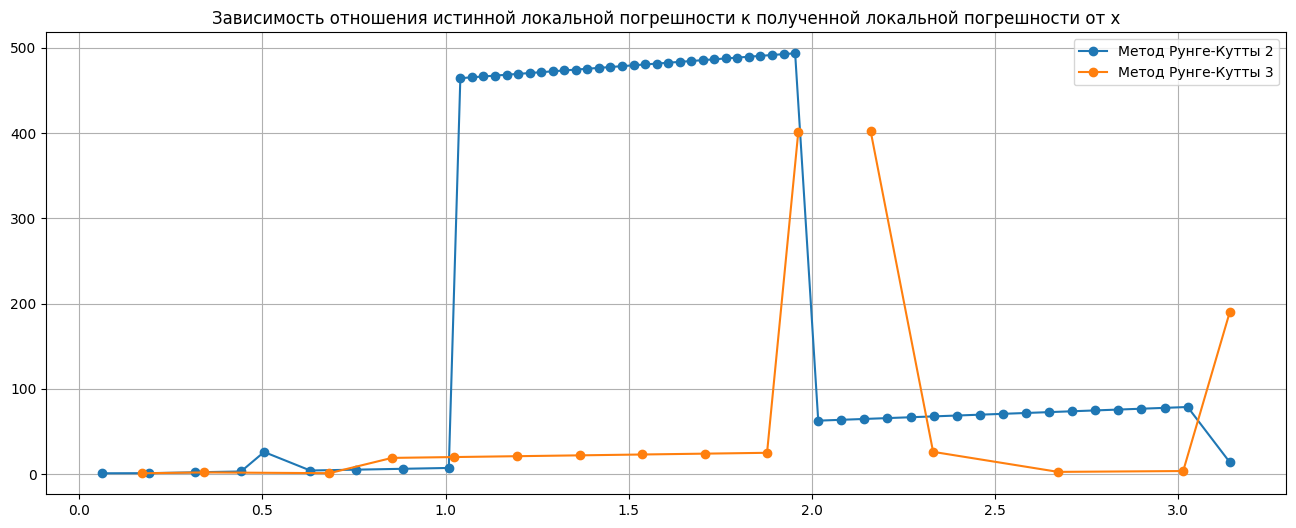

In [2543]:
# Явный метод Рунге-Кутты 2-го порядка (ЯМРК 2)
args_2 = x0 + np.cumsum(auto_step_steps_2)  # Точки x, в которых считали ДУ
real_loc_error_2 = np.zeros(len(args_2))
for i, arg in enumerate(args_2):
    real_loc_error_2[i] = norm(auto_step_values_2[i] - np.array([y1(arg), y2(arg)]))
ksi_2 = real_loc_error_2 / auto_step_local_errors_2

# Явный метод Рунге-Кутты 3-го порядка (ЯМРК 3)
args_3 = x0 + np.cumsum(auto_step_steps_3)  # Точки x, в которых считали ДУ
real_loc_error_3 = np.zeros(len(args_3))
for i, arg in enumerate(args_3):
    real_loc_error_3[i] = norm(auto_step_values_3[i] - np.array([y1(arg), y2(arg)]))
ksi_3 = real_loc_error_3 / auto_step_local_errors_3

ksi_3_modified = ksi_3.copy()
indices_max = np.argpartition(ksi_3, -6)[-6:]
ksi_3_modified[indices_max] = np.nan

# Построение графиков
plt.figure(figsize=(16, 6))
plt.title('Зависимость отношения истинной локальной погрешности к полученной локальной погрешности от x')
plt.plot(args_2, ksi_2, marker='o', label="Метод Рунге-Кутты 2")
plt.plot(args_3, ksi_3_modified, marker='o', label="Метод Рунге-Кутты 3")
plt.grid()
plt.legend();

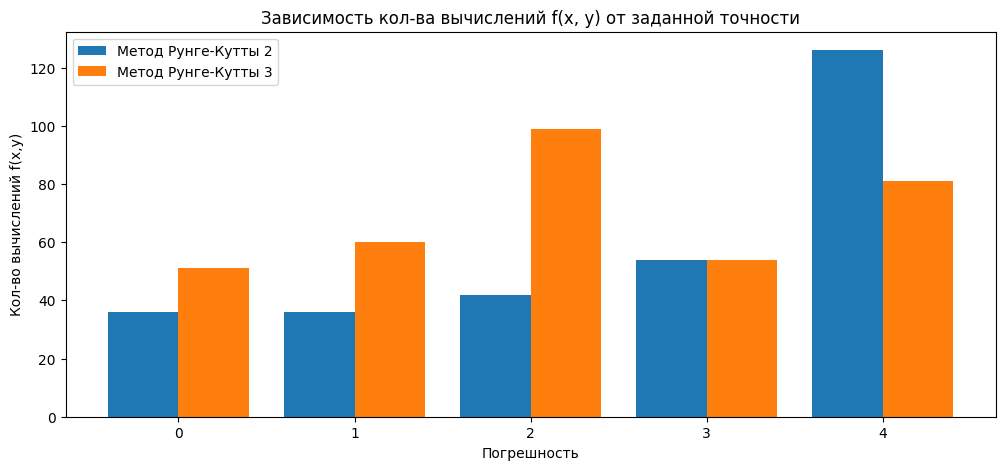

In [2544]:
p_list = [10e-1, 10e-2, 10e-3, 10e-4, 10e-5]

calc_list_2 = []
calc_list_3 = []
for p in p_list:
    params.p = p
    calc_list_2.append(np.sum(auto_step(x0, x1, y0, s_2, params)[3]))
    calc_list_3.append(np.sum(auto_step(x0, x1, y0, s_3, params)[3]))

# Построение графиков
plt.figure(figsize=(12, 5))
plt.title('Зависимость кол-ва вычислений f(x, y) от заданной точности')
plt.bar(-np.log10(p_list) - 0.2, calc_list_2, width=0.4, label='Метод Рунге-Кутты 2')
plt.bar(-np.log10(p_list) + 0.2, calc_list_3, width=0.4, label='Метод Рунге-Кутты 3')
plt.xlabel('Погрешность')
plt.ylabel('Кол-во вычислений f(x,y)')
plt.legend();